In [ ]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [ ]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

## Conjunto de dados grande e ruidoso

+ Adiciona-se ruído Gaussiano branco (média 0 e variância igual 2) ao modelo gerador.

In [ ]:
# Number of examples.
N = 1000000

# Attribute.
x1 = np.random.randn(N, 1)

# Create target function.
y = x1 + 0.5*x1**2

# Noise.
w = np.sqrt(2)*np.random.randn(N, 1)

# Noisy version of the target function.
y_noisy = y + w

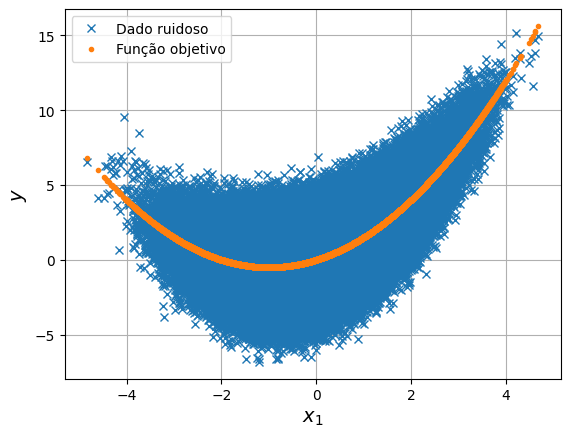

In [ ]:
plt.figure()
plt.plot(x1, y_noisy, 'x', label='Dado ruidoso')
plt.plot(x1, y, '.', label='Função objetivo')
plt.legend(loc='best')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
#Show the plot.
plt.show()

Degree: 1.0 - MSE: 2.50533
Degree: 2.0 - MSE: 2.00521
Degree: 10.0 - MSE: 2.00518
Degree: 20.0 - MSE: 2.00514


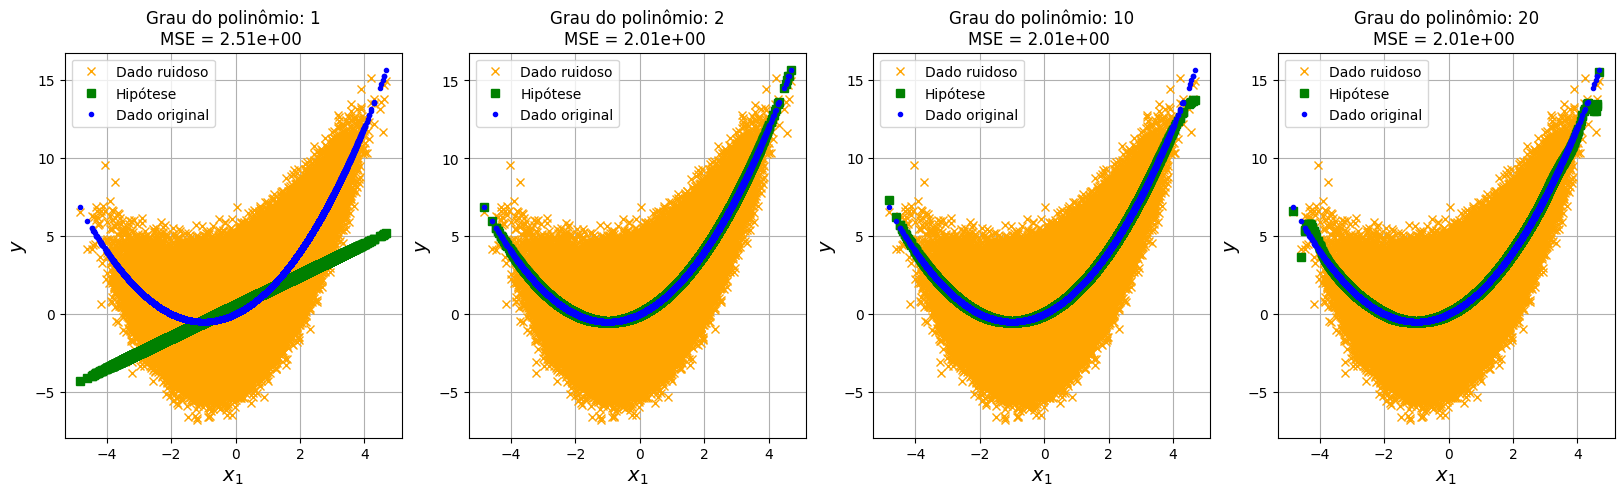

In [ ]:
# Polinomial degrees to be tested.
degrees = [1, 2, 10, 20]

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=False)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)

    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)

    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)

    print('Degree: %1.1f - MSE: %1.5f' % (degrees[i], mse))

    plt.plot(x1, y_noisy, 'x', color='orange', label='Dado ruidoso')
    plt.plot(x1, yp1, 'gs', label='Hipótese')
    plt.plot(x1, y, 'b.', label='Dado original')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.title("Grau do polinômio: {}\nMSE = {:.2e} ".format(degrees[i], mse))
    plt.grid()

# Show the plot.
plt.show()

**Observações**

+ Mesmo tendo um conjunto de treinamento bastante grande, o MSE dos polinômios com ordem maior do que 1 tende ao valor da variância do ruído.


+ O modelo com formato de reta tem MSE maior pois ele se distancia muito da função objetivo ([Explicação](https://colab.research.google.com/github/zz4fap/tp555-ml/blob/main/exemplos/non-linear-regression/variancia_e_vies_mse_for_big_datasetv1.ipynb)).


+ Como o número de amostras é muito maior do que as ordens escolhidas, a **relação de compromisso entre os erros de bias e de variância se estende por várias ordens**, pois os modelos não têm flexibilidade (grau de liberdade) o suficiente para se ajustar ao conjunto de treinamento, apenas ao modelo gerador.

# A influência do ruído, o erro irredutível.

Dado que temos um **modelo ótimo** (relação de compromisso entre erros de viés e de variância), o menor valor possível para o **erro quadrático médio (MSE)** mesmo com um conjunto de treinamento muito grande (e.g., tendendo ao infinito), **porém ruidoso**, é determinado pela *quantidade* de ruído presente na base de dados.

Ou seja, não se pode ter um **erro quadrático médio menor do que a quantidade de ruído que contaminou as amostras**, a menos, claro, que o modelo esteja **sobreajustando**, aí o MSE tende a zero.

Este erro é denominado de **erro irredutível**.

Por exemplo, considere a seguinte **função observável**

$$y_{noisy} = y + w,$$

com

$$ y = a_1 x_1 + a_2 x_1^2,$$

e a seguinte função hipótese

$$\hat{y} = \hat{a}_1 x_1 + \hat{a}_2 x_1^2,$$

onde $w$ é ruído Guassiano com média 0 e variância igual a 2, então

$$\lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} (y_{noisy} - \hat{y})^2
%
\\ = E[(y_{noisy} - \hat{y})^2]
%
\\ = E[y_{noisy}^2] -2 E[y_{noisy} \hat{y}] + E[\hat{y}^2]
%
\\= E[y^2 + 2yw + w^2] -2 E[\hat{y}y + \hat{y}w] + E[\hat{y}^2]
%
\\= E[y^2] + E[w^2] -2 E[\hat{y}y]  + E[\hat{y}^2],$$

onde a penúltima igualdade é obtida usando-se $y_{noisy} = y + w$.

Idealmente, para $N \to \infty$, então $\hat{a}_1 =  a_1$  e $\hat{a}_2 = a_2$, e $\hat{y} = y$. Portanto

$$\lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} (y_{noisy} - \hat{y})^2  = E[y^2] -2 E[y^2] + E[y^2] + E[w^2] \\= E[w^2],$$

ou seja, o **menor valor possível para o MSE será igual ao `momento de segunda ordem` do ruído**, e, como ele tem média igual a zero, ele se torna igual a sua variância.

No caso do exemplo acima, a variância de $w$ é igual a $2$ e, portanto, o menor erro quadrático médio será $2$, como visto.